# Analyse Bytenigma



In [3]:
# Alway run first
# import bytenigma
import sys
sys.path.append('../../')
from krypto import bytenigma

import numpy as np
from collections import Counter
import base64, json
import matplotlib.pyplot as plt

## Generelles

So lange sich nur ein Rotor bewegt (0 nicht an oberster Stelle), lassen sich alle nachgehängten Rotoren, inklusive der bitweisen Negation, welche als ein statischer Rotor substituiert werden kann, auf einen konstanten Rotor reduzieren.
Dies ist bei unserem Beispiel, für jeweils 256 Byte (bis die 0 des ersten Rotors an oberster Stelle steht) große Blöcke der Fall.
Somit ist für diese Blöcke jeweils nur ein monoalphabetisches Substitutionsverfahren angewendet.

## Schlüsselraum

Anzahl der Rotoren: a \
256 Byte Mapping pro Rotor = 256! Möglichkeiten pro Rotor

Gesamtschlüsselraum ohne Einschränkungen: 256!^a

> Mit Einschränkung Komplement:\
> (Letzter Rotor hat immer zwei äquivalente Mappings, da invertiert, also nur 128! Möglichkeiten)
> 
> 256!^(a-1) * 128!


# Bias

## Bias bei Chosen-Plaintext

Bei der Verschlüsselung des Megabyte an Nullen, treten für mich nur zwei beobachtbare Effekte auf: 
- Die Null mappt niemals auf sich selbst 
- Die restlichen Outputs wirken recht gleich verteilt
- Und irgendwie könnte das oben symmetrisch sein, mit einer Spiegelachse zwischen 100 und 150 (Eventuell 128)

Nullen:  0


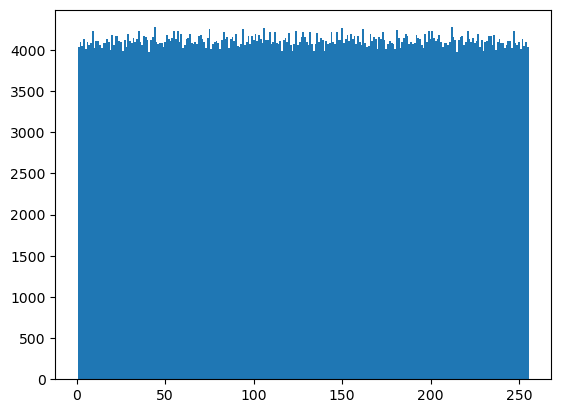

In [4]:
with open("../../data/out.json") as f:
    out = json.load(f)
    out = base64.b64decode(out["output"])
    counted = Counter(out)
    plt.bar(counted.keys(), counted.values(), width= 1.0)
    zero = out.count(0)
    print("Nullen: ", zero)


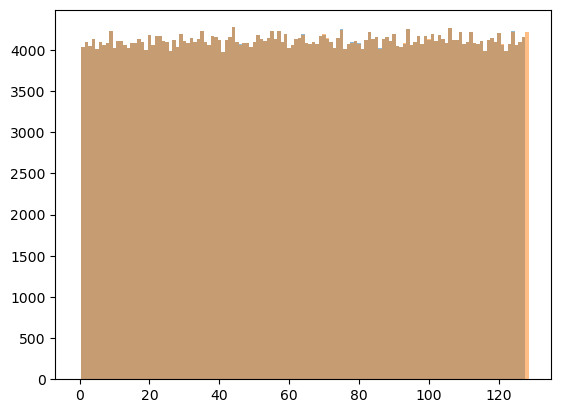

In [32]:
with open("../../../data/out.json") as f:
    out = json.load(f)
    out = base64.b64decode(out["output"])
    counted = Counter()
    counted[0] = 0
    counted.update(out)
    sorted_counts = sorted(counted.items(), key = lambda x:x[0])
    keys, values = zip(*sorted_counts)
    plt.bar(keys[:128], values[:128], width= 1.0, alpha=0.5)
    plt.bar([256 - x for x in keys[128:][::-1]], values[128:][::-1], width= 1.0, alpha=0.5)

wenn man also die beiden Plots halbiert und einen verkehrt herum über den anderen legt, fällt auf, dass beide wirklich genau perfekt aufeinander passen.\
Der einzige orangene Balken, welcher nicht auf einen blauen fällt, ist bei 128, der vermuteten Spiegelachse. \
Da dies über 1Mb Daten ging, ist das Rotorübergreifend und somit ein Bias im Algorithmus.

## Mehr Bias

Also wird das jetzt mit einem anderen Input einmal getestet.\
Hier wird einfach 256 x 0, danach 256 x 1, usw verschlüsselt. \
Dies entspricht theoretisch dem Input den man benötigt, um einmal jedes Zeichen auf jedes Zeichen in einem 256 Byte Block zu mappen.

<BarContainer object of 256 artists>

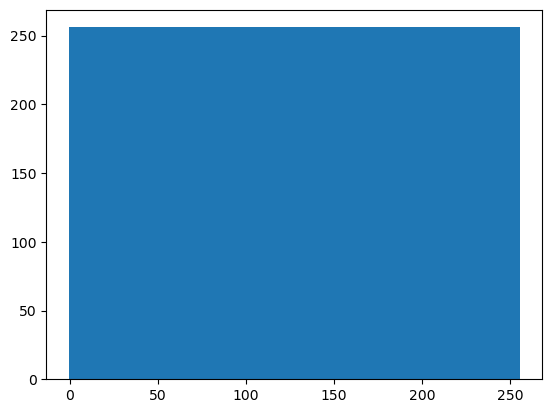

In [5]:
rotors =  [
    [ 169, 240, 17, 218, 156, 74, 211, 46, 109, 15, 4, 236, 255, 172, 139, 161, 62, 145, 55, 9, 94, 97, 210, 182, 23, 197, 134, 194, 216, 253, 217, 149, 128, 61, 116, 183, 69, 135, 241, 133, 89, 123, 179, 245, 178, 80, 21, 113, 158, 22, 57, 222, 108, 75, 79, 195, 41, 144, 142, 76, 77, 42, 12, 32, 90, 103, 129, 136, 248, 246, 159, 243, 131, 37, 78, 87, 226, 36, 10, 247, 107, 224, 221, 66, 8, 225, 147, 244, 167, 104, 176, 92, 202, 132, 122, 189, 20, 151, 35, 16, 47, 214, 0, 212, 95, 232, 239, 242, 39, 175, 204, 56, 38, 96, 64, 98, 138, 73, 192, 166, 115, 196, 174, 119, 19, 235, 154, 72, 117, 48, 160, 99, 186, 164, 126, 53, 26, 249, 91, 100, 111, 181, 203, 105, 252, 124, 18, 88, 171, 208, 60, 227, 49, 81, 114, 199, 59, 30, 230, 237, 229, 63, 71, 70, 219, 130, 54, 40, 165, 233, 254, 3, 86, 193, 207, 127, 106, 68, 153, 162, 82, 31, 24, 102, 140, 34, 5, 205, 28, 215, 6, 50, 2, 110, 168, 184, 85, 29, 170, 7, 137, 150, 163, 198, 58, 43, 33, 180, 251, 148, 191, 13, 157, 231, 25, 67, 84, 228, 250, 93, 185, 173, 11, 200, 52, 155, 83, 209, 141, 125, 118, 238, 51, 234, 14, 146, 223, 143, 1, 220, 187, 190, 112, 201, 206, 27, 152, 213, 101, 65, 44, 121, 188, 177, 120, 45 ],
    [ 229, 0, 106, 253, 254, 33, 47, 171, 186, 56, 15, 191, 212, 122, 194, 103, 240, 62, 136, 81, 228, 172, 187, 154, 38, 175, 26, 7, 242, 50, 77, 113, 80, 163, 138, 46, 111, 5, 146, 143, 75, 71, 28, 155, 1, 94, 150, 206, 216, 25, 74, 23, 197, 6, 20, 174, 183, 21, 153, 40, 24, 220, 236, 182, 8, 66, 116, 41, 192, 217, 31, 96, 100, 78, 184, 214, 176, 131, 200, 76, 232, 156, 104, 205, 230, 193, 160, 48, 245, 203, 10, 45, 95, 117, 65, 180, 101, 177, 215, 222, 18, 59, 219, 35, 36, 198, 201, 64, 207, 226, 167, 224, 249, 43, 178, 223, 112, 86, 233, 208, 85, 90, 4, 128, 34, 120, 227, 199, 92, 102, 69, 173, 49, 218, 243, 83, 239, 244, 247, 210, 61, 118, 251, 2, 32, 27, 105, 44, 142, 12, 169, 9, 123, 88, 73, 110, 29, 188, 141, 126, 54, 248, 170, 168, 209, 181, 179, 91, 231, 189, 58, 225, 125, 255, 252, 70, 152, 37, 51, 144, 124, 14, 16, 84, 161, 234, 166, 119, 107, 11, 22, 109, 55, 139, 42, 162, 97, 241, 238, 39, 89, 133, 148, 250, 213, 145, 157, 137, 68, 67, 129, 135, 99, 53, 57, 211, 202, 140, 195, 221, 115, 52, 149, 79, 190, 108, 134, 132, 17, 3, 164, 87, 246, 151, 237, 185, 93, 127, 196, 82, 204, 63, 121, 235, 98, 13, 30, 114, 19, 147, 130, 165, 60, 72, 159, 158 ],
    [ 33, 90, 105, 220, 76, 63, 47, 12, 204, 192, 34, 77, 69, 188, 62, 185, 223, 217, 68, 145, 54, 89, 119, 232, 8, 137, 53, 249, 16, 17, 133, 32, 151, 140, 171, 194, 197, 87, 148, 205, 235, 203, 78, 253, 61, 44, 166, 234, 25, 164, 72, 120, 67, 186, 14, 142, 238, 97, 121, 73, 49, 210, 115, 35, 224, 85, 233, 131, 107, 218, 236, 41, 144, 241, 143, 13, 209, 116, 5, 240, 38, 51, 242, 250, 4, 52, 10, 175, 254, 201, 79, 3, 229, 27, 22, 213, 158, 50, 225, 81, 37, 99, 215, 65, 154, 75, 251, 200, 125, 248, 152, 132, 226, 239, 246, 74, 86, 46, 18, 94, 130, 113, 161, 117, 102, 173, 103, 43, 21, 88, 9, 190, 36, 178, 124, 112, 59, 177, 122, 92, 80, 30, 198, 118, 127, 95, 138, 211, 108, 70, 155, 189, 176, 146, 170, 20, 56, 230, 244, 1, 147, 160, 157, 31, 57, 156, 182, 98, 23, 150, 7, 169, 199, 237, 129, 212, 228, 163, 26, 181, 245, 183, 167, 15, 19, 106, 64, 180, 11, 134, 179, 100, 101, 42, 162, 96, 40, 58, 111, 60, 71, 231, 48, 207, 184, 247, 196, 24, 208, 222, 221, 28, 128, 84, 227, 139, 109, 6, 174, 187, 149, 153, 214, 136, 195, 110, 191, 123, 39, 219, 252, 91, 216, 165, 0, 172, 168, 202, 159, 141, 135, 83, 243, 82, 55, 66, 114, 93, 126, 104, 255, 193, 2, 29, 206, 45 ]
]
counter = Counter()
for i in range(256):
    counter[i] = 0
for i in range(256):
    inp = [i] * 256
    out = bytenigma.bytenigma(rotors, inp)
    counter.update(out)

plt.bar(counter.keys(), counter.values(), width=1.0)

Das sieht dann richtig schön aus.

Und wenn man jetzt einfach mal die Häufigkeit der Outputs zählt und jedes mal wenn eine Zahl mehr als einmal vorkommt einen weißen Pixel da hin malt sieht das so aus:

![Pixelbild](./img/256x256_repeated_bytes.png)

Hier fällt eine Sache ganz besonders auf, der Cut bei 102, welcher der Punkt der Drehung des zweiten Rotors ist.\
Eine weitere Auffälligkeit ist eine Art Spur, von rechts oben nach links unten, welche sich durch die gesamte Matrix zieht.

## Noch mehr Bias

Zur Vereinfachung weiterer Beobachtungen wird die Bytenigma nun auf 3 Bit vereinfacht.
Hier ist bei nur einem Rotor wirklich viel zu sehen, wie ein einfaches hochzählen, sowie zwei Spiegelachsen, wenn die Vorkommen einer Zahl nach Index sortiert werden.
Das ganze taucht bei größeren Rotoren ebenfalls auf (getestet auch mit 4 Bit).
Leider macht der zweite Rotor das ganze, jedenfalls für die hier betrachteten Matrizen, wieder kaputt.
Aus Zeitgründen, werden Analysen auf größere Matrizen, mit zwei sich drehenden Rotoren hier nicht weiter betrachtet.
Es müsste jedoch ähnliche Symmetrien (Ausgenommen das konstante Hochzählen) ab dem Erreichen einer ganzen Periode (hier 64) auftreten.

![3 Bit Bytenigma](./img/Kauma-4.jpg)

Die Nullachse, tritt konstant auf, da niemals eine Zahl auf sich selber mappt.
